In [66]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import scipy

FIG_SIZE = (15,10)

# Часть 1

### Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
### Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

$A$ - подсудимый виновен  
$B$ - кровь редкой группы  
$B | A$ - редкая группы крови, при условии человек у виновен   
$A | B$ - виновен , при редкой группы крови  
$Р(B) - 0.01$  
$P(B | A) - 1$  
$P(A | B) - ?$

Откуда получил прокурор 99% не понятно, если он расчитал вероятность как $P = 1 - P(B)$, то он получил вероятность того что человека обычная группа корви  
Если прокурор хотел посчитать вероятность того что подсудимый виновен имея редкую группу крови $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$, вероятность того что подсудимый виновен $P(A)$, нам неизвестна

### Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат выдал вероятность того что случайный человек с редкой группы  крови виновен за  вероятность виновности ,если известно что у убийцы редкая группа крови $P(A|B)$  
Для защиты лучше оценить вероятность невиновности при редкой группе крови $P(\overline{A}|B) = 1 - P(A|B)$

### Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.  
### Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
### Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


A - положительный тест  
B - болезнь  
A|B - положительный тест при болезнии   
$P(B|A) = \frac{P(A|B)P(B)}{P(A|B)P(B) + P(A|\overline{B})P(\overline{B})} = \frac{(1 - P(A|\overline{B})P(B)}{(1-P(\overline{A}|B))P(B) + P(A|\overline{B})P(\overline{B})}$  
$P(B|\overline{A}) = \frac{P(\overline{A}|B)P(B)}{P(\overline{A}|B)P(B) + P(\overline{A}|\overline{B})P(\overline{B})} = \frac{ P(\overline{A}|B)P(B)}{P(\overline{A}|B))P(B + (1 - P(A|\overline{B}))P(\overline{B})}$,  
где $P(A|\overline{B})$ FP,  a $P(\overline{A}|B)$ FN

In [67]:
b = 0.01
error = np.arange(0,0.0501,0.001)

In [68]:
def post_pos(fn, fp):
    return ((1 - fn) * 0.01) / ((1 - fn) * 0.01 + fp * 0.99)

In [69]:
def post_neg(fn, fp):
    return (fn * 0.01) / (fn * 0.01 + (1 - fp) * 0.99)

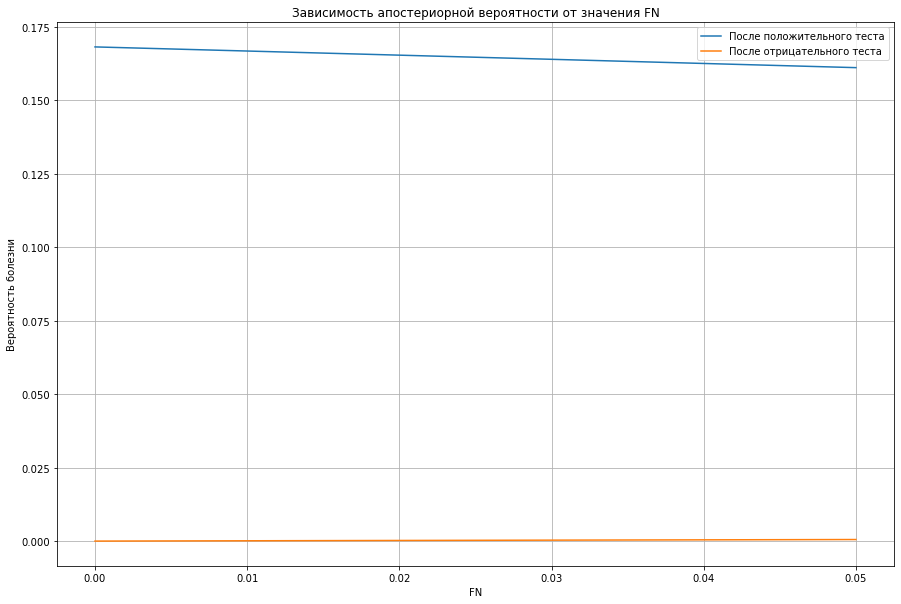

In [70]:
pos = post_pos(error, 0.05)
neg = post_neg(error, 0.05)

plt.figure(figsize=FIG_SIZE)
plt.plot(error, pos, label='После положительного теста')
plt.plot(error, neg, label='После отрицательного теста')
plt.legend()
plt.grid()
plt.title('Зависимость апостериорной вероятности от значения FN')
plt.xlabel('FN')
plt.ylabel('Вероятность болезни')
plt.show()

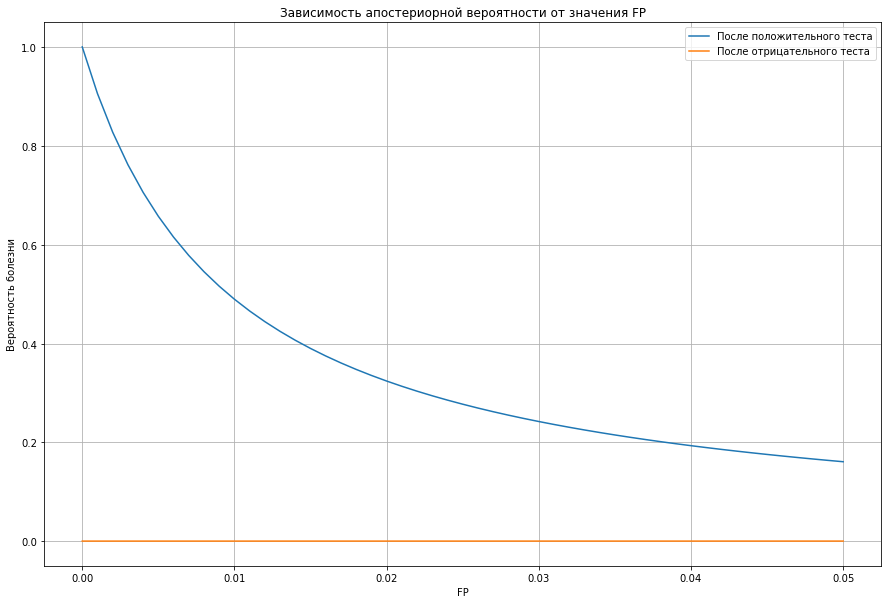

In [71]:
pos = post_pos(0.05, error)
neg = post_neg(0.05, error)

plt.figure(figsize=FIG_SIZE)
plt.plot(error, pos, label='После положительного теста')
plt.plot(error, neg, label='После отрицательного теста')
plt.legend()
plt.grid()
plt.title('Зависимость апостериорной вероятности от значения FP')
plt.xlabel('FP')
plt.ylabel('Вероятность болезни')
plt.show()

Не имея информации о болезни, ее смертности и стоимости лечения основываясь только на полученых графиках, рекомендация для врачей - снижать FP, что позволит более уверено выявлять заболевших. С дополнительной информацией рекомендации могут иметь совершенно другой характер. 

# Часть 2

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [74]:
df = pd.read_csv('owid-covid-data.csv')

In [75]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [76]:
df['new_cases'].replace(0, 1, inplace=True)

In [77]:
df.date = pd.to_datetime(df.date)

In [78]:
df_rus = df[(df.date >= '2020-03') & (df.location == 'Russia')]

In [79]:
train_idx = 50

### Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.


Text(0.5, 1.0, 'Количесто новых случаев COVID-19 в России')

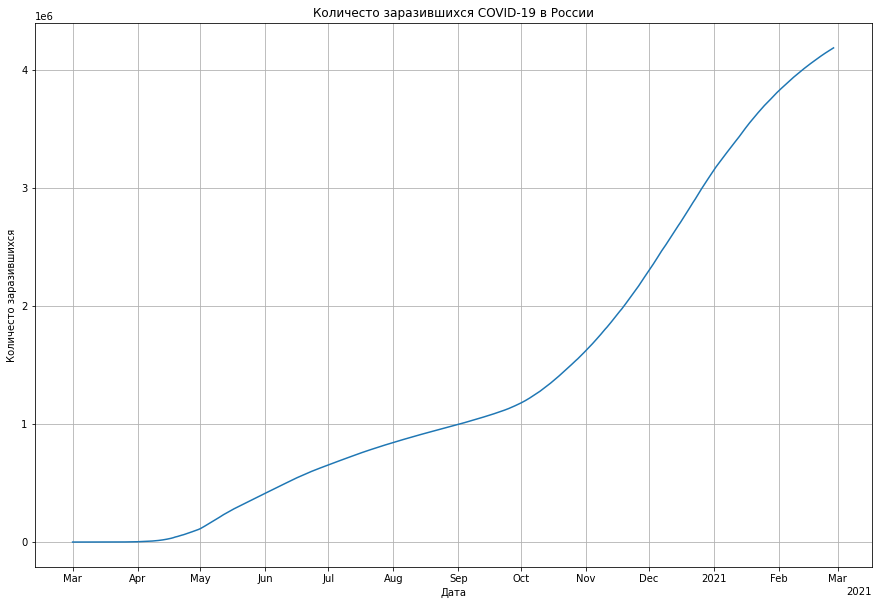

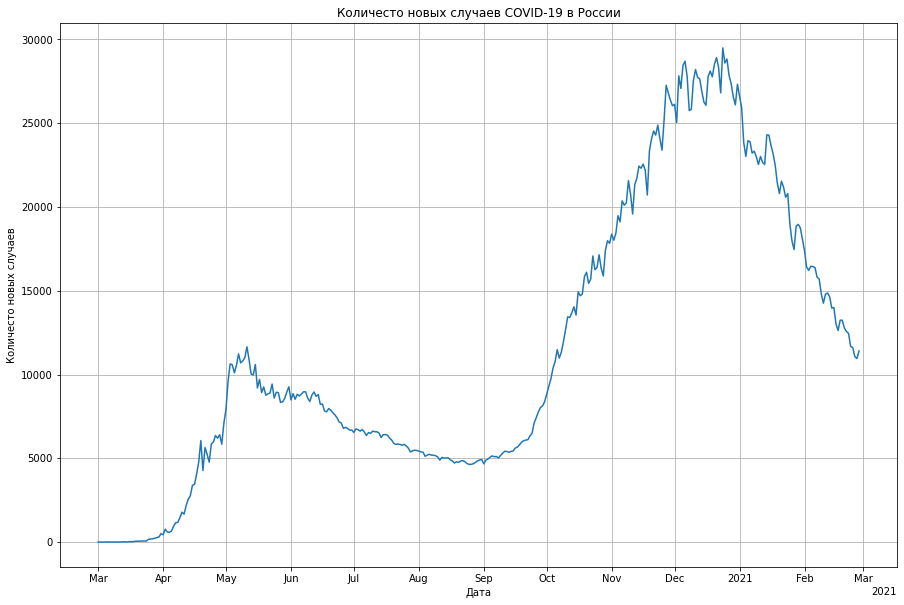

In [80]:
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.plot(df_rus['date'], df_rus.total_cases)
plt.ylabel('Количесто заразившихся')
plt.xlabel('Дата')
plt.grid()
ax.set_title('Количесто заразившихся COVID-19 в России')

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.plot(df_rus['date'], df_rus.new_cases)
plt.ylabel('Количесто новых случаев')
plt.xlabel('Дата')
plt.grid()
ax.set_title('Количесто новых случаев COVID-19 в России')

### Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.


In [81]:
X = (df_rus.date - pd.to_datetime('2020-03')).astype('<m8[D]').values.reshape((-1,1))

In [82]:
day = (df_rus.date - pd.to_datetime('2020-03')).astype('<m8[D]').values.reshape((-1,1))

In [83]:
y_total = np.log(df_rus.total_cases).values.reshape((-1,1))
y_new = np.log(df_rus.new_cases).values.reshape((-1,1))

In [84]:
X_train, X_test = X[:train_idx], X[train_idx:] 
y_train_total, y_test_total = y_total[:train_idx], y_total[train_idx:]
y_train_new, y_test_new = y_new[:train_idx], y_new[train_idx:]

Text(0.5, 1.0, 'Количесто новых заболевших COVID-19 в России')

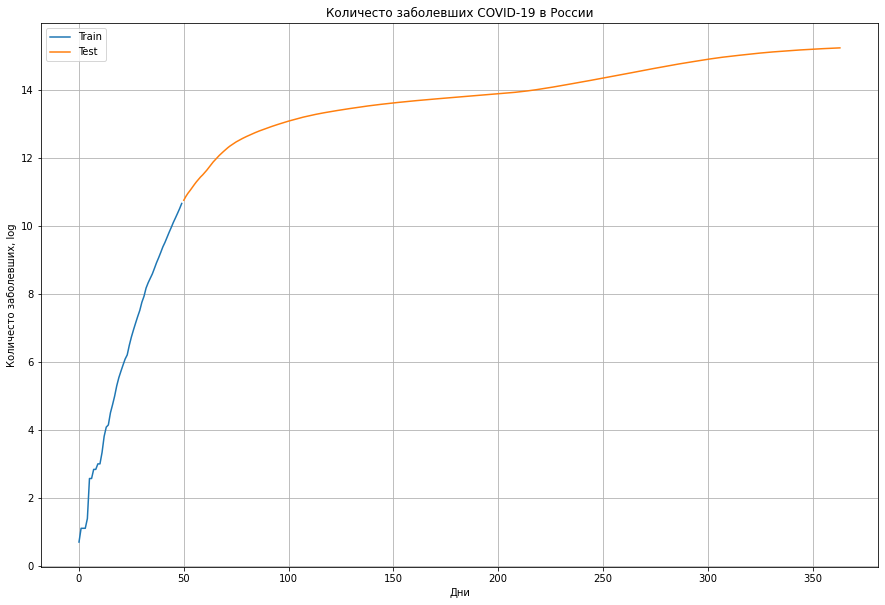

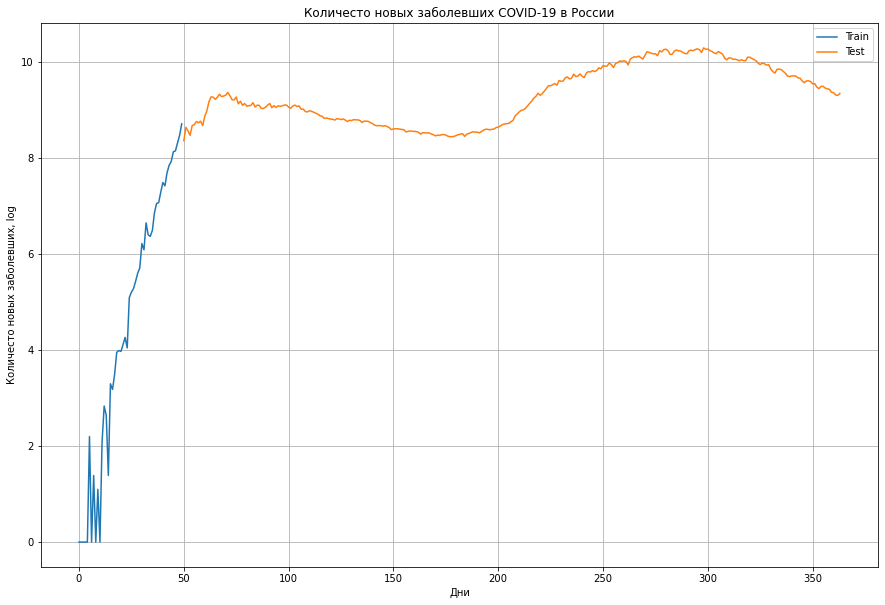

In [85]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_train, y_train_total)
plt.plot(X_test, y_test_total)
plt.ylabel('Количесто заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Train", "Test"])
ax.set_title('Количесто заболевших COVID-19 в России')

fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_train, y_train_new)
plt.plot(X_test, y_test_new)
plt.ylabel('Количесто новых заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Train", "Test"])
ax.set_title('Количесто новых заболевших COVID-19 в России')

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.  
взял логарифм от у и х

In [86]:
lin_reg = LinearRegression(fit_intercept=False).fit(X_train, y_train_total)
y_train_total_pred = lin_reg.predict(X_train)
y_test_total_pred = lin_reg.predict(X_test)



Text(0.5, 1.0, 'Количесто заболевших COVID-19 в России, после 50 дней')

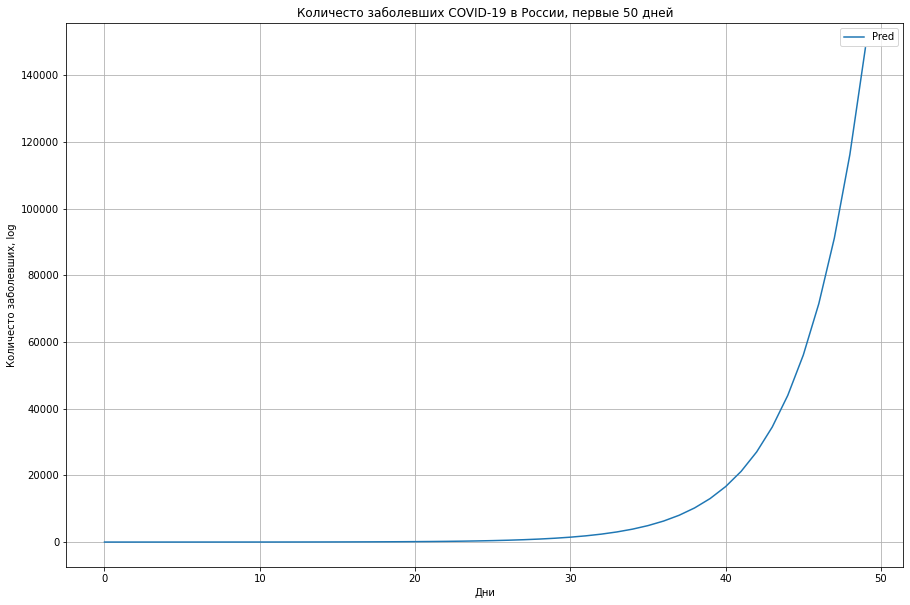

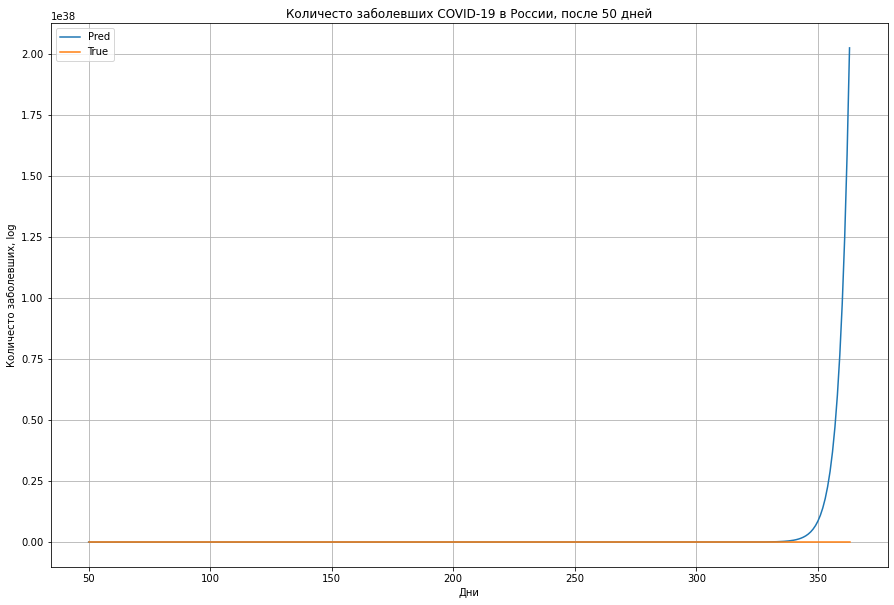

In [87]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_train, np.exp(y_train_total_pred))
plt.ylabel('Количесто заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Pred", "True"])
ax.set_title('Количесто заболевших COVID-19 в России, первые 50 дней')

fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_test, np.exp(y_test_total_pred))
plt.plot(X_test, np.exp(y_test_total))
plt.ylabel('Количесто заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Pred", "True"])
ax.set_title('Количесто заболевших COVID-19 в России, после 50 дней')


In [88]:
lin_reg = LinearRegression(fit_intercept=False).fit(X_train, y_train_new)
y_train_new_pred = lin_reg.predict(X_train)
y_test_new_pred = lin_reg.predict(X_test)

Text(0.5, 1.0, 'Количесто новых заболевших COVID-19 в России, после 50 дней')

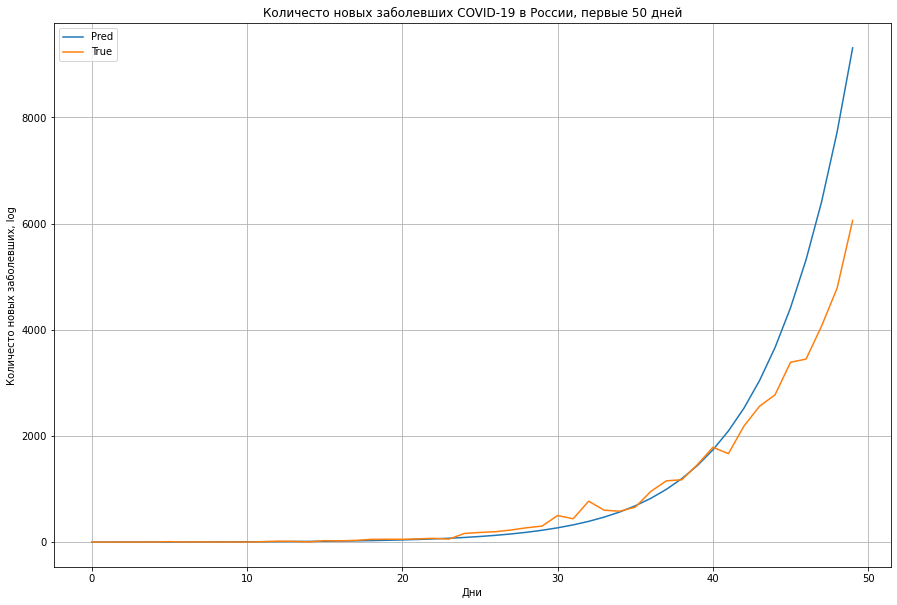

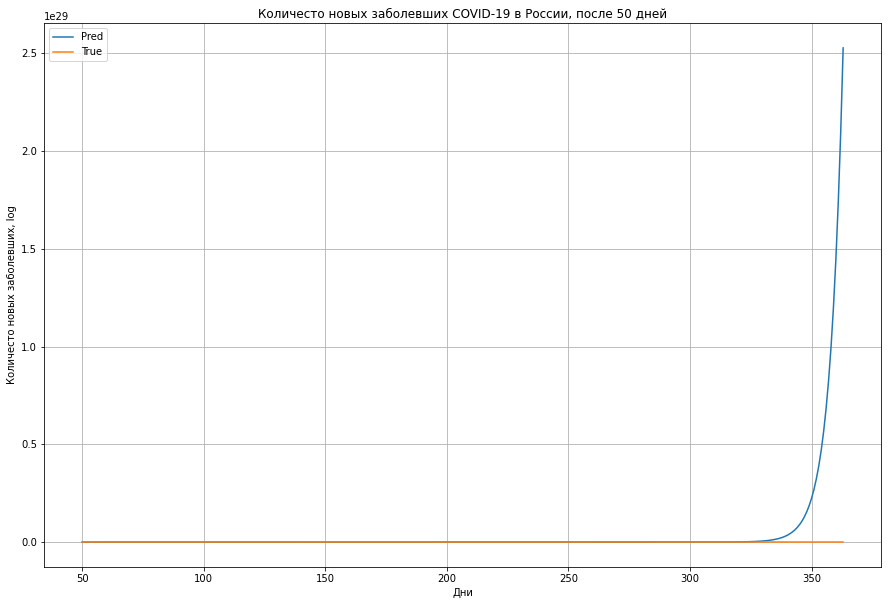

In [89]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_train, np.exp(y_train_new_pred))
plt.plot(X_train, np.exp(y_train_new))
plt.ylabel('Количесто новых заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Pred", "True"])
ax.set_title('Количесто новых заболевших COVID-19 в России, первые 50 дней')

fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.plot(X_test, np.exp(y_test_new_pred))
plt.plot(X_test, np.exp(y_test_new))
plt.ylabel('Количесто новых заболевших, log')
plt.xlabel('Дни')
plt.grid()
plt.legend(["Pred", "True"])
ax.set_title('Количесто новых заболевших COVID-19 в России, после 50 дней')



### Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [90]:
dispersion = mean_squared_error(y_train_total, (np.random.random(len(y_train_total_pred)) + np.array(y_train_total_pred).T).reshape((-1,1)),) # костыли
X_O = np.ones((len(X_train), 2))
X_O[:, 1] = X_train.reshape(-1)
sigma_total = np.linalg.inv(np.eye(2) + (X_O.T @ X_O) / dispersion)
mu_total = sigma_total @ (X_O.T @ np.log(np.asarray(df_rus.iloc[:50].total_cases))) / dispersion

In [91]:
dispersion = mean_squared_error(y_train_new,y_train_new_pred)
X_O = np.ones((len(X_train), 2))
X_O[:, 1] = X_train.reshape(-1)
sigma_new = np.linalg.inv(np.eye(2) + (X_O.T @ X_O) / dispersion)
mu_new = sigma_new @ (X_O.T @ np.log(np.asarray(df_rus.iloc[:50].new_cases))) / dispersion

<ipython-input-92-57c596ae4021>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z, cmap = plt.cm.jet)


Text(0.5, 1.0, 'Апостериорное распределение параметров модели')

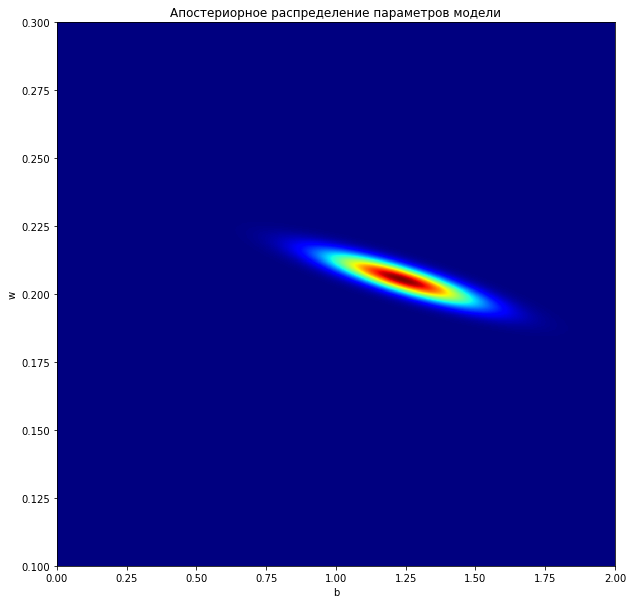

In [92]:
N = 1000
plt.figure(figsize=(10,10))
X = np.linspace(0,2,N)
Y = np.linspace(0.1,0.3,N)
X, Y = np.meshgrid(X,Y)
pos = np.empty(X.shape + (2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = scipy.stats.multivariate_normal.pdf(pos, mean = mu_total, cov = sigma_total)
plt.xlim((0,2))
plt.ylim((0.1,0.3))
plt.pcolormesh(X,Y,Z, cmap = plt.cm.jet)
plt.ylabel('w')
plt.xlabel('b')
plt.title('Апостериорное распределение параметров модели')

<ipython-input-93-975dad800601>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z, cmap = plt.cm.jet)


Text(0.5, 1.0, 'Апостериорное распределение параметров модели')

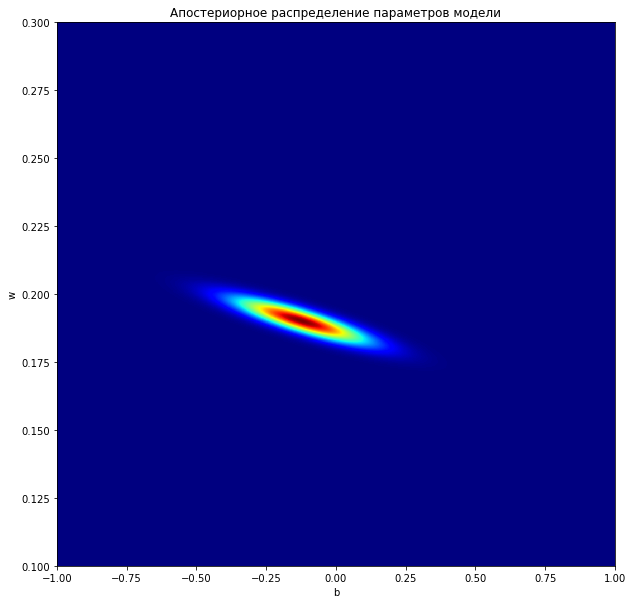

In [93]:
N = 1000
plt.figure(figsize=(10,10))
X = np.linspace(-1,1,N)
Y = np.linspace(0.1,0.3,N)
X, Y = np.meshgrid(X,Y)
pos = np.empty(X.shape + (2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z = scipy.stats.multivariate_normal.pdf(pos, mean = mu_new, cov = sigma_new)
plt.xlim((-1,1))
plt.ylim((0.1,0.3))
plt.pcolormesh(X,Y,Z, cmap = plt.cm.jet)
plt.ylabel('w')
plt.xlabel('b')
plt.title('Апостериорное распределение параметров модели')

### Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


<Figure size 432x288 with 0 Axes>

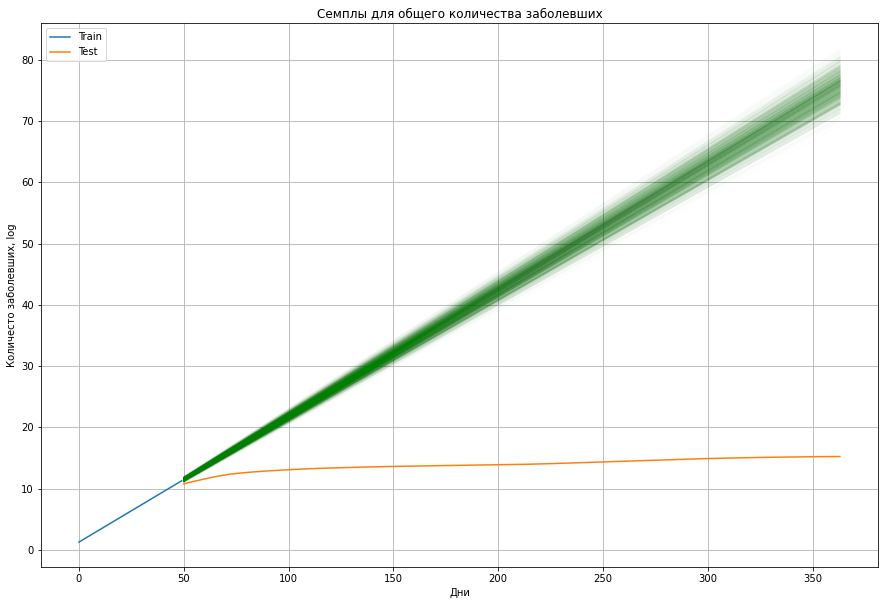

In [99]:
X = np.ones((len(day), 2))
X[:, 1] = np.array(day).reshape(-1)

weights = scipy.stats.multivariate_normal(mean=mu_total, cov=sigma_total).rvs(size=1000)

lin_reg = LinearRegression().fit(X_train, y_train_total)
y_train_total = lin_reg.predict(X_train)
y_test_total_pred = lin_reg.predict(X_test)
plt.figure()
plt.figure(figsize=FIG_SIZE)
plt.plot(day[:train_idx], y_train_total)
plt.plot(day[train_idx:], y_test_total)
plt.title('Семплы для общего количества заболевших')
plt.legend(["Train", "Test", "Sample"])
plt.ylabel('Количесто заболевших, log')
plt.xlabel('Дни')
plt.grid()

may_total = []
june_total = []
semptember_total = []

for w in weights:
    lin_reg.coef_ = np.array(w[1]).reshape((-1,1))
    lin_reg.intercept_ = np.array(w[0]).reshape((-1,1))
    y_pred = lin_reg.predict(day[train_idx:])
    plt.plot(day[train_idx:], y_pred , color='green', alpha=0.01)

    may_total.append(y_pred[8][0])
    june_total.append(y_pred[37][0])
    semptember_total.append(y_pred[19][0])

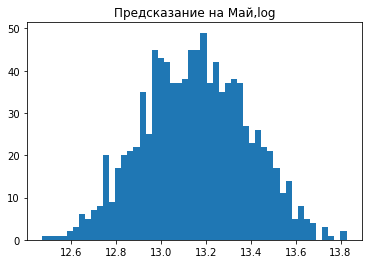

Среднее значение 516316.6864891813


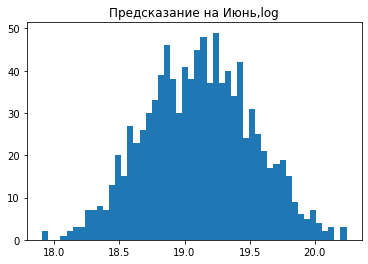

Среднее значение 200183155.56828976


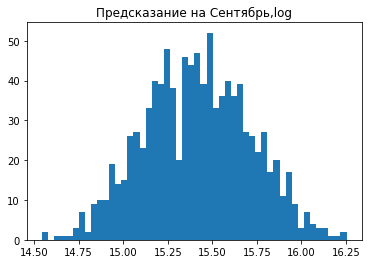

Среднее значение 4951825.150342165


In [100]:
plt.hist(may_total, bins=50)
plt.title('Предсказание на Май,log')
plt.show()
print('Среднее значение', np.exp(np.mean(may_total)))
plt.hist(june_total, bins=50)
plt.title('Предсказание на Июнь,log')
plt.show()
print('Среднее значение', np.exp(np.mean(june_total)))
plt.hist(semptember_total, bins=50)
plt.title('Предсказание на Сентябрь,log')
plt.show()
print('Среднее значение', np.exp(np.mean(semptember_total)))

<Figure size 432x288 with 0 Axes>

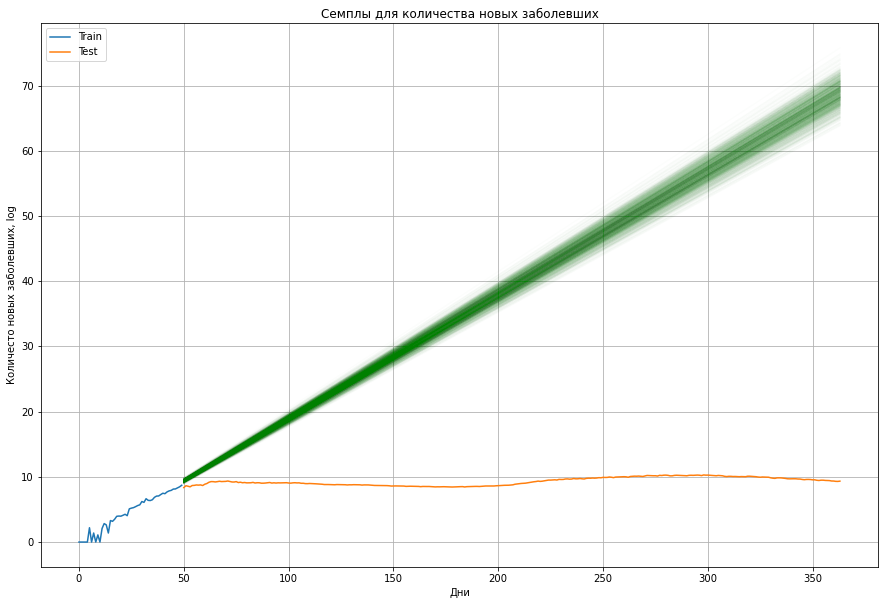

In [101]:
X = np.ones((len(day), 2))
X[:, 1] = np.array(day).reshape(-1)

weights = scipy.stats.multivariate_normal(mean=mu_new, cov=sigma_new).rvs(size=1000)
lin_reg = LinearRegression().fit(X_train, y_train_new)
y_train_new_pred = lin_reg.predict(X_train)
y_test_new_pred = lin_reg.predict(X_test)
plt.figure()
plt.figure(figsize=FIG_SIZE)
plt.plot(day[:train_idx], y_train_new)
plt.plot(day[train_idx:], y_test_new)
plt.title('Семплы для количества новых заболевших')
plt.legend(["Train", "Test", "Sample"])
plt.ylabel('Количесто новых заболевших, log')
plt.xlabel('Дни')
plt.grid()

may_new = []
june_new = []
semptember_new = []

for w in weights:
    lin_reg.coef_ = np.array(w[1]).reshape((-1,1))
    lin_reg.intercept_ = np.array(w[0]).reshape((-1,1))
    y_pred = lin_reg.predict(day[train_idx:])
    plt.plot(day[train_idx:], y_pred , color='green', alpha=0.01)
    may_new.append(y_pred[8][0])
    june_new.append(y_pred[37][0])
    semptember_new.append(y_pred[109][0])

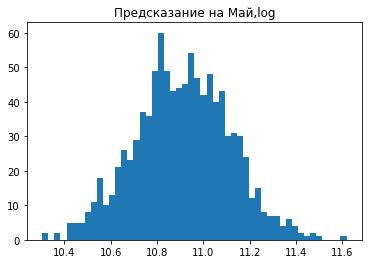

Среднее значение 54700.51486630369


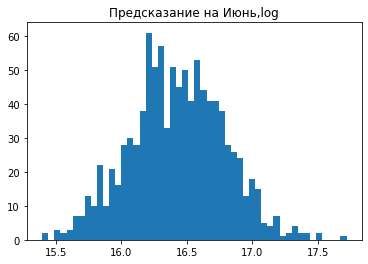

Среднее значение 13624632.916704524


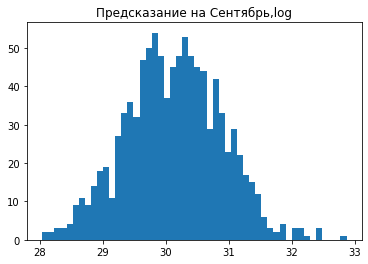

Среднее значение 12129480675059.178


In [102]:
plt.hist(may_new, bins=50)
plt.title('Предсказание на Май,log')
plt.show()
print('Среднее значение', np.exp(np.mean(may_new)))
plt.hist(june_new, bins=50)
plt.title('Предсказание на Июнь,log')
plt.show()
print('Среднее значение', np.exp(np.mean(june_new)))
plt.hist(semptember_new, bins=50)
plt.title('Предсказание на Сентябрь,log')
plt.show()
print('Среднее значение', np.exp(np.mean(semptember_new)))